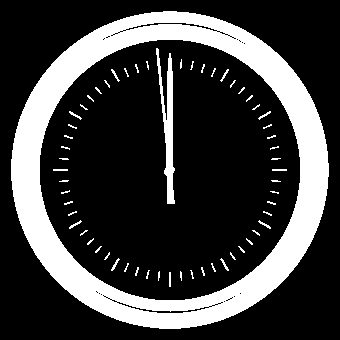

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Kernel for Morphological Transformations
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
image = cv2.imread('/content/clock2.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)



cv2_imshow(binary_image)
#plt.imshow(binary_image)
print(binary_image)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
print("Kernel for Morphological Transformations")
print(kernel)

Kernel for Morphological Transformations
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


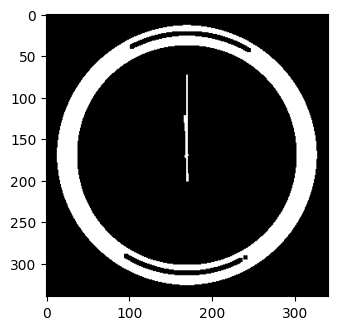

In [ ]:
def erosion(image, structuring_element):
    # Get the dimensions of the image and structuring element
    img_height, img_width = len(image), len(image[0])
    se_height, se_width = len(structuring_element), len(structuring_element[0])

    # Find the center of the structuring element
    se_center_y, se_center_x = se_height // 2, se_width // 2

    # Create an empty output image with the same size as the original image
    output_image = [[0 for _ in range(img_width)] for _ in range(img_height)]

    # Perform erosion
    for y in range(img_height):
        for x in range(img_width):
            min_value = 255  # Initialize to maximum pixel value (assumes 8-bit grayscale)
            for i in range(se_height):
                for j in range(se_width):
                    # Calculate the corresponding position in the image for the current structuring element pixel
                    img_y = y + i - se_center_y
                    img_x = x + j - se_center_x
                    # Check if the corresponding pixel exists in the image
                    if 0 <= img_y < img_height and 0 <= img_x < img_width:
                        # Apply erosion operation: find the minimum value in the neighborhood
                        if structuring_element[i][j] == 1:
                            min_value = min(min_value, image[img_y][img_x])
            # Update the output image with the minimum value
            output_image[y][x] = min_value

    return(output_image)


kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
print("Kernel for Morphological Transformations")
print(kernel)

eroded_image=erosion(binary_image,kernel)


#img_erosion = cv2.erode(binary_image, kernel, iterations=1)
#plt.imshow(img_erosion)
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
#ax2 = fig.add_subplot(122)
ax1.imshow(eroded_image, cmap='gray', vmin=0, vmax=255)
#ax1.title.set_text('Original Image')
#ax2.imshow(img_erosion, cmap='gray', vmin=0, vmax=255)
#ax2.title.set_text('Result of Standard Average Filtering Kernel')


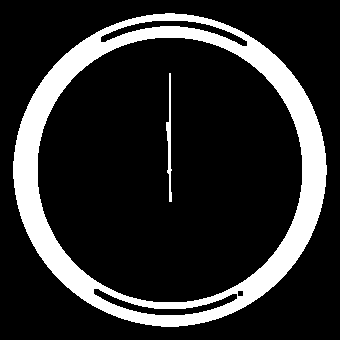

In [ ]:
img_erosion = cv2.erode(binary_image, kernel, iterations=1)
cv2_imshow(img_erosion)

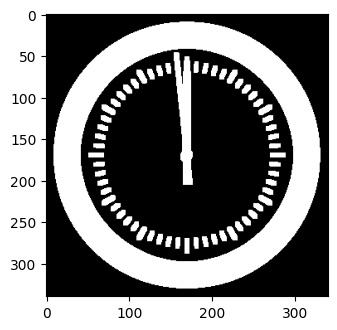

In [ ]:
def dilation(image, structuring_element):
    # Get the dimensions of the image and structuring element
    img_height, img_width = len(image), len(image[0])
    se_height, se_width = len(structuring_element), len(structuring_element[0])

    # Find the center of the structuring element
    se_center_y, se_center_x = se_height // 2, se_width // 2

    # Create an empty output image with the same size as the original image
    output_image = [[0 for _ in range(img_width)] for _ in range(img_height)]

    # Perform dilation
    for y in range(img_height):
        for x in range(img_width):
            max_value = 0  # Initialize to minimum pixel value (assumes 8-bit grayscale)
            for i in range(se_height):
                for j in range(se_width):
                    # Calculate the corresponding position in the image for the current structuring element pixel
                    img_y = y + i - se_center_y
                    img_x = x + j - se_center_x
                    # Check if the corresponding pixel exists in the image
                    if 0 <= img_y < img_height and 0 <= img_x < img_width:
                        # Apply dilation operation: find the maximum value in the neighborhood
                        if structuring_element[i][j] == 1:
                            max_value = max(max_value, image[img_y][img_x])
            # Update the output image with the maximum value
            output_image[y][x] = max_value

    return output_image
dilated_image=dilation(binary_image,kernel)
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)

ax1.imshow(dilated_image, cmap='gray', vmin=0, vmax=255)